In [1]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="password",
    database="olist"
)

In [3]:
review_selling_sql = """
    WITH sales_category AS (
        SELECT
        	category_name_translation.product_category_name_english AS category_name,
            ROW_NUMBER() OVER (ORDER BY COUNT(order_items.product_id) DESC) AS sales_rank
        FROM
        	order_items
        INNER JOIN
        	products
        ON
        	order_items.product_id = products.product_id
        INNER JOIN
        	category_name_translation
        ON
        	products.product_category_name = category_name_translation.product_category_name
        GROUP BY
        	category_name
    ),
    reviews_category AS (
        SELECT
        	category_name_translation.product_category_name_english AS category_name,
            ROW_NUMBER() OVER (ORDER BY AVG(reviews.review_score) DESC) AS reviews_rank
        FROM
        	reviews
        INNER JOIN
        	order_items
        ON
        	reviews.order_id = order_items.order_id
        INNER JOIN
        	products
        ON
        	order_items.product_id = products.product_id
        INNER JOIN
        	category_name_translation
        ON
        	products.product_category_name = category_name_translation.product_category_name
        GROUP BY
        	category_name
    )
    SELECT
        sales_category.category_name,
        sales_category.sales_rank,
        reviews_category.reviews_rank
    FROM
        sales_category
    INNER JOIN
        reviews_category
    ON
        sales_category.category_name = reviews_category.category_name
"""

In [4]:
review_selling_df = pd.read_sql(review_selling_sql, conn)
review_selling_df = review_selling_df.set_index("category_name")
review_selling_df.to_csv("review_sales_rank.csv", header=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_49804\2630743135.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  review_selling_df = pd.read_sql(review_selling_sql, conn)


In [5]:
review_selling_df

,sales_rank,reviews_rank
category_name,,
agro_industry_and_commerce,44,48
air_conditioning,35,51
art,45,55
arts_and_craftmanship,67,28
audio,32,62
...,...,...
stationery,16,16
tablets_printing_image,54,29
telephony,8,53


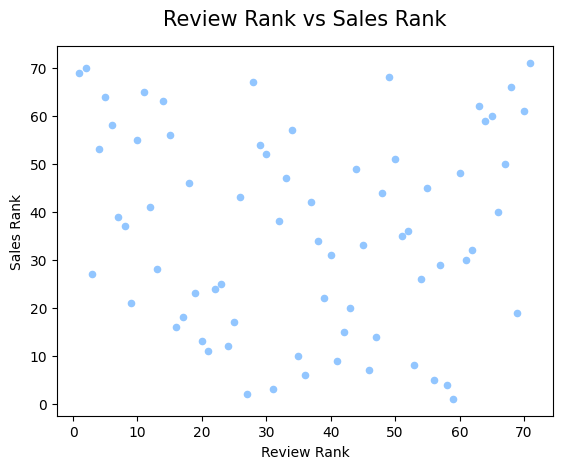

In [6]:
plt.style.use("seaborn-v0_8-pastel")
figure = review_selling_df.plot(
    kind="scatter", 
    x="reviews_rank", 
    y="sales_rank"
)
figure.set_title("Review Rank vs Sales Rank", size=15, pad=15)
plt.xlabel("Review Rank")
plt.ylabel("Sales Rank")
plt.savefig("review_sales_rank.png", bbox_inches='tight')